In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
#creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[1])
circuit.h(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[2])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

In [2]:
circuit.draw('text')

┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘
q_3: ───────────────────────────────────────────────────────
                                                            
c: 4/═══════════════════════════════════════════════════════

In [5]:
import qiskit_aer
sv_sim = qiskit_aer.Aer.get_backend('statevector_simulator')
result = sv_sim.run(circuit).result()
statevec = result.get_statevector()
from qiskit.visualization import array_to_latex, plot_histogram
array_to_latex(statevec, prefix="|\\psi\\rangle =")


<IPython.core.display.Latex object>

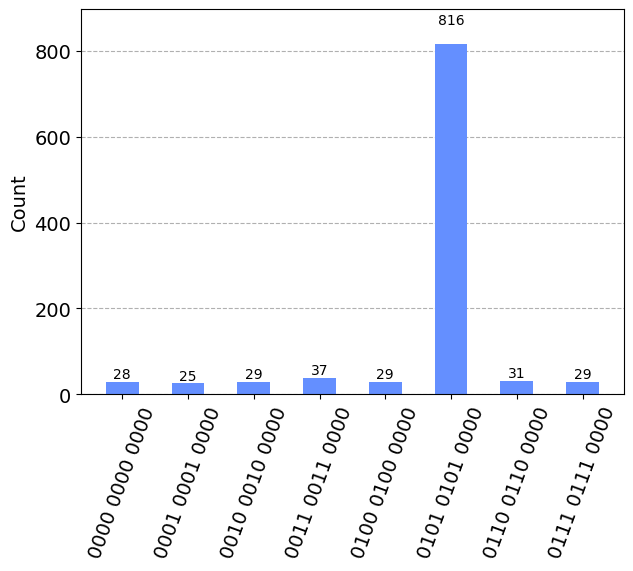

In [6]:
circuit.measure_all()
qasm_sim = qiskit_aer.Aer.get_backend('qasm_simulator')
result = qasm_sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)